# New York Taxi Trip January 2019

**Hani Bounoua**, Phd Student / Data Scientist / Freelancer.

I had an issue while pushing the project to Gitlab/Github. the file `2019-01.sqlite` is to large to be pushed. So you can use the csv file I provided in `./Data/2019/` for that use:

``` python
DF = pd.read_csv(CSV_PATH)
```

After the

Because of data volume we will use a 10k rows sample frome `tripdata` table in `2019-01.sqlite` data base.

In [1]:
# Built-in module:
import sqlite3 
from os import getcwd, listdir, path
from pathlib import Path
from datetime import datetime

# Data Manipulation modules:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)

## Setting paths to sqlite database:

In [2]:
NB_PATH = getcwd()
BASE = Path(NB_PATH).parent
DATA_2019 = path.join(BASE, "Data", "2019")
CSV_PATH = path.join(DATA_2019, "10k_data_sample.csv") 

Loading data table into pandas DataFrame:

``` python
DB_PATH = path.join(DATA_2019, "2019-01.sqlite")
SQL_QUERRY = "SELECT * FROM tripdata" # This is a SQL query to select tripdata and read it with pandas.
with sqlite3.connect(DB_PATH) as con:
    DF = pd.read_sql_query(SQL_QUERRY, con)
```

In [3]:
DF = pd.read_csv(CSV_PATH)

In [4]:
print(f'Table\'s Shape : {DF.shape}')

Table's Shape : (7667792, 18)


## Exploratory Data Analysis

First we inspect data by looking at the first five rows.

In [5]:
DF.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2019-01-01 00:46:40.000000,2019-01-01 00:53:20.000000,1.0,1.5,1.0,N,151.0,239.0,1.0,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1.0,2019-01-01 00:59:47.000000,2019-01-01 01:18:59.000000,1.0,2.6,1.0,N,239.0,246.0,1.0,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2.0,2018-12-21 13:48:30.000000,2018-12-21 13:52:40.000000,3.0,0.0,1.0,N,236.0,236.0,1.0,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2.0,2018-11-28 15:52:25.000000,2018-11-28 15:55:45.000000,5.0,0.0,1.0,N,193.0,193.0,2.0,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2.0,2018-11-28 15:56:57.000000,2018-11-28 15:58:33.000000,5.0,0.0,2.0,N,193.0,193.0,2.0,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [6]:
DF.dtypes

vendorid                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
ratecodeid               float64
store_and_fwd_flag        object
pulocationid             float64
dolocationid             float64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

#### Type conversion Categoricales:

Using the dectionnary we can se that the columns, vendorid, passenger_count, ratecodeid, payment_type, pulocationid and dolocationid are categorical. So we will parse it to integer

In [7]:
DF['vendorid'] = DF.vendorid.map(lambda x: int(x))
DF['passenger_count'] = DF.passenger_count.map(lambda x: int(x))
DF['ratecodeid'] = DF.ratecodeid.map(lambda x: int(x))
DF['payment_type'] = DF.payment_type.map(lambda x: int(x))
DF['pulocationid'] = DF.pulocationid.map(lambda x: int(x))
DF['dolocationid'] = DF.dolocationid.map(lambda x: int(x))

#### Parssing DateTime:

As we see here we have two columns `tpep_pickup_datetime` and `tpep_dropoff_datetime`, which are date-time loaded as string.

Before parsing it to `datetime` data types, It will be better to get some extra informations from it:

    - `tpep_pickup_hour`: It will let use agregate the data to the distribution of demand during a day and hourly incomes.
    - `tpep_pickup_date`: we will use it to do some timeseries exploratory analysis. 

Then we can parse the `tpep_pickup_datetime` and `tpep_dropoff_datetime`.

In [8]:
DF["tpep_pickup_hour"] = DF.tpep_pickup_datetime.map(lambda x: int(x[11:13]))
DF["tpep_pickup_date"] = DF.tpep_pickup_datetime.map(lambda x: datetime.strptime(x[:10], "%Y-%m-%d"))
DF["tpep_pickup_datetime"] = DF.tpep_pickup_datetime.map(lambda x: datetime.strptime(x[:19], "%Y-%m-%d %H:%M:%S"))
DF["tpep_dropoff_datetime"] = DF.tpep_dropoff_datetime.map(lambda x: datetime.strptime(x[:19], "%Y-%m-%d %H:%M:%S"))

#### Trip duration:

After parsing this tow columns, it is natural to compute a trip duration, 

In [9]:
DF["trip_duration"] = (DF.tpep_dropoff_datetime - DF.tpep_pickup_datetime)
DF["trip_duration"] = DF.trip_duration.map(lambda x : round(x.seconds / 60, 2))

In [10]:
DF.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_hour,tpep_pickup_date,trip_duration
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,0,2019-01-01,6.67
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,0,2019-01-01,19.20
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,13,2018-12-21,4.17
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,15,2018-11-28,3.33
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,15,2018-11-28,1.60


#### Traffic Flow

This featur will let use see how the traffic is at diffrent houres of the day. it will be expressed as mean speed of trip (Km/min).

In [11]:
DF = DF.loc[DF.trip_distance > 0.0].loc[DF.trip_duration > 0.0]

In [12]:
DF["trip_distance"] = DF.trip_distance * 1.6
DF["trip_flow"] = (DF.trip_distance / DF.trip_duration)

In [13]:
DF.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,tpep_pickup_hour,tpep_pickup_date,trip_duration,trip_flow
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,2.40,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,0,2019-01-01,6.67,0.359820
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,4.16,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,0,2019-01-01,19.20,0.216667
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,2.08,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN,0,2019-01-01,7.15,0.290909
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,5.92,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN,0,2019-01-01,13.63,0.434336
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,3.36,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN,0,2019-01-01,12.00,0.280000


### Data Visualization:

#### VendorID

This column represent diffrente service provider according to Data Dictionary – Yellow Taxi Trip Records there is only two vendorid:

    - 1 = Creative Mobile Technologies, LLC
    - 2 = VeriFone Inc.

In [14]:
vendorid = DF[["vendorid", "passenger_count"]].groupby(["vendorid"]).count().reset_index().rename(columns={"passenger_count": "nbr_trips"})
vendorid

,vendorid,nbr_trips
0,1,2914476
1,2,4621843
2,4,76381


Because we vendorid must contain only two values (I refer to a data dictionary), we have to remove from the table `DF` the trips with `vendorid == 4`.

/tmp/ipykernel_8950/1765116223.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendorid_without_OL["nbr_trips"] = vendorid_without_OL.nbr_trips.map(lambda x: round(x * 100 / vendorid_without_OL.nbr_trips.sum(), 2))


Text(0.5, 1.0, 'Vendorid rate by trip')

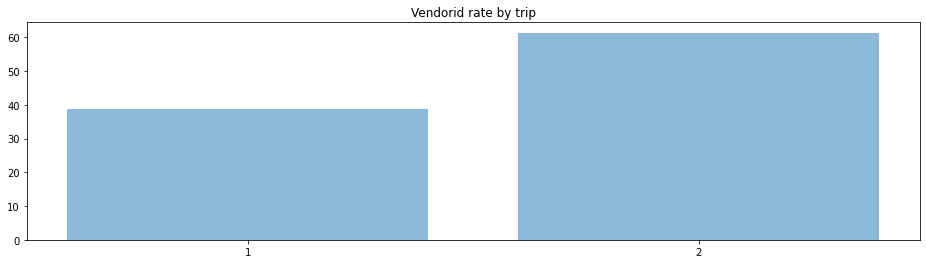

In [15]:
DF = DF.loc[DF["vendorid"] != 4]

vendorid_without_OL = vendorid.loc[vendorid["vendorid"] != 4]
vendorid_without_OL["nbr_trips"] = vendorid_without_OL.nbr_trips.map(lambda x: round(x * 100 / vendorid_without_OL.nbr_trips.sum(), 2))

plt.figure(figsize=(16, 4))

plt.bar(vendorid_without_OL.vendorid, vendorid_without_OL.nbr_trips, align='center', alpha=0.5)
plt.xticks(vendorid_without_OL.vendorid)
plt.title("Vendorid rate by trip")

### Passenger Count:

It must be a positive number.

In [16]:
passenger_count = DF[["passenger_count", "vendorid"]].groupby(["passenger_count"]).count().reset_index().rename(columns={"vendorid": "nbr_trips"})
passenger_count

,passenger_count,nbr_trips
0,0,115626
1,1,5338563
2,2,1106514
3,3,312956
4,4,139883
5,5,322666
6,6,200093
7,7,7
8,8,10
9,9,1


We can se from the agregated table above that there is 115626 trip with 0 passenger count and passenger count with more than 6 passenger with cumulates number of trips 18. I choose to remove those trips.

/tmp/ipykernel_8950/103902635.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passenger_count_without_OL["nbr_trips"] = passenger_count_without_OL.nbr_trips.map(lambda x: round(x * 100 / passenger_count_without_OL.nbr_trips.sum(), 2))


Text(0.5, 1.0, 'passenger count rate by trip')

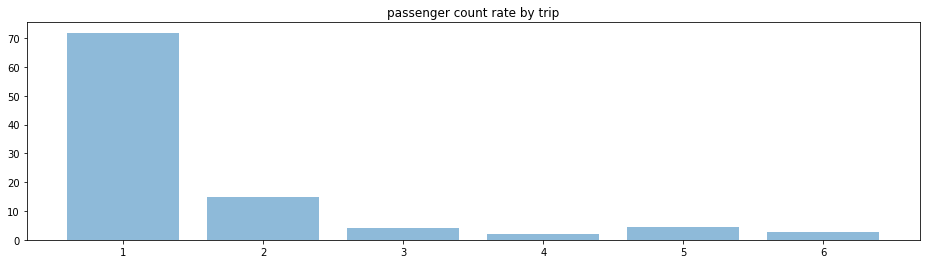

In [18]:
DF = DF.loc[DF.passenger_count.isin(np.arange(1,7))] # filte : we select rows with passenger count in [1, 7[

passenger_count_without_OL = passenger_count.loc[passenger_count["passenger_count"].isin(np.arange(1,7))]
passenger_count_without_OL["nbr_trips"] = passenger_count_without_OL.nbr_trips.map(lambda x: round(x * 100 / passenger_count_without_OL.nbr_trips.sum(), 2))
plt.figure(figsize=(16, 4))

plt.bar(passenger_count_without_OL.passenger_count, passenger_count_without_OL.nbr_trips, align='center', alpha=0.5)
plt.title("passenger count rate by trip")

### Trip distance:

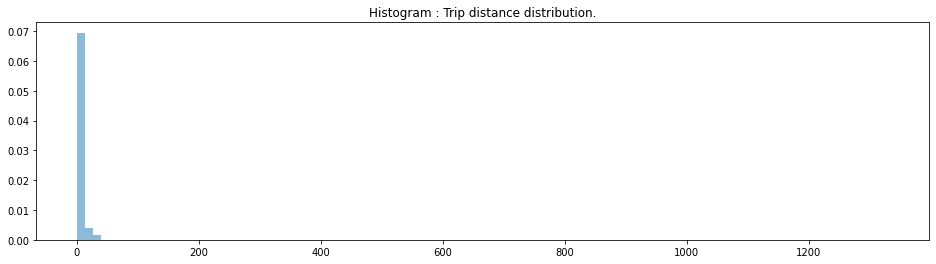

In [19]:
plt.figure(figsize=(16, 4))
n, bins, patches = plt.hist(DF.trip_distance, density=True, bins=100, alpha=0.5)
plt.title("Histogram : Trip distance distribution.")
plt.show()

As we can see in the figure above, we can consider the values of trip distance greater than a 40 as outliers:

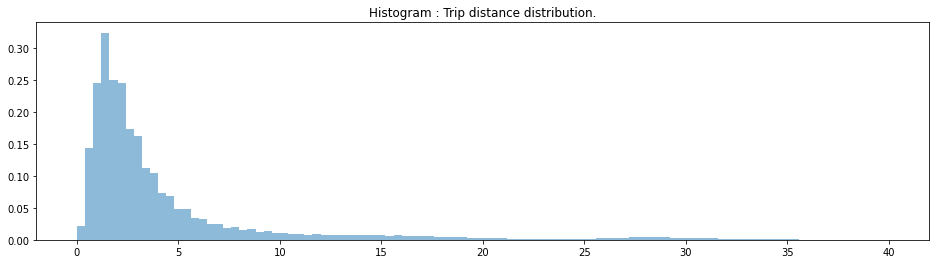

In [20]:
DF = DF.loc[DF.trip_distance < 40]

plt.figure(figsize=(16, 4))
n, bins, patches = plt.hist(DF.trip_distance, density=True, bins=100, alpha=0.5)
plt.title("Histogram : Trip distance distribution.")
plt.show()

### Trip duration

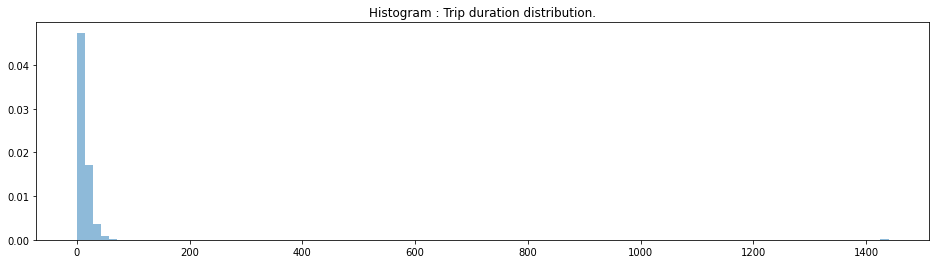

In [21]:
plt.figure(figsize=(16, 4))
n, bins, patches = plt.hist(DF.trip_duration, density=True, bins=100, alpha=0.5)
plt.title("Histogram : Trip duration distribution.")
plt.show()

As we can see in the figure above, we can consider the values of trip duration greater than a 90 as outliers:

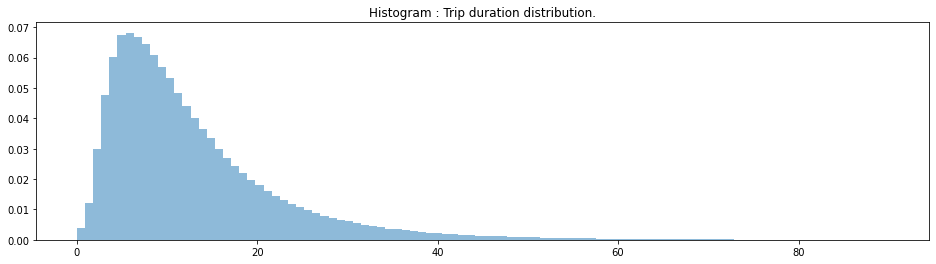

In [22]:
DF = DF.loc[DF.trip_duration < 90]

plt.figure(figsize=(16, 4))
n, bins, patches = plt.hist(DF.trip_duration, density=True, bins=100, alpha=0.5)
plt.title("Histogram : Trip duration distribution.")
plt.show()

### Time Series Analysis

In [23]:
TimeSeries = DF[['tpep_pickup_date', 'tpep_pickup_hour', 'trip_flow']].groupby(['tpep_pickup_date', 'tpep_pickup_hour']).count().reset_index().sort_values(['tpep_pickup_date', 'tpep_pickup_hour'])
TimeSeries = TimeSeries.loc[TimeSeries.tpep_pickup_date.map(lambda x: (x >= datetime.strptime("2019-01-01", "%Y-%m-%d")) & (x <= datetime.strptime("2019-01-31", "%Y-%m-%d")))].rename(columns={'trip_flow': "nbr_trip"})
TimeSeries['tpep_pickup_hour'] = TimeSeries.tpep_pickup_hour.map(lambda x: str(x))
TimeSeries.head()

,tpep_pickup_date,tpep_pickup_hour,nbr_trip
21,2019-01-01,0,12914
22,2019-01-01,1,14816
23,2019-01-01,2,12674
24,2019-01-01,3,10037
25,2019-01-01,4,6548


<AxesSubplot:xlabel='tpep_pickup_date', ylabel='nbr_trip'>

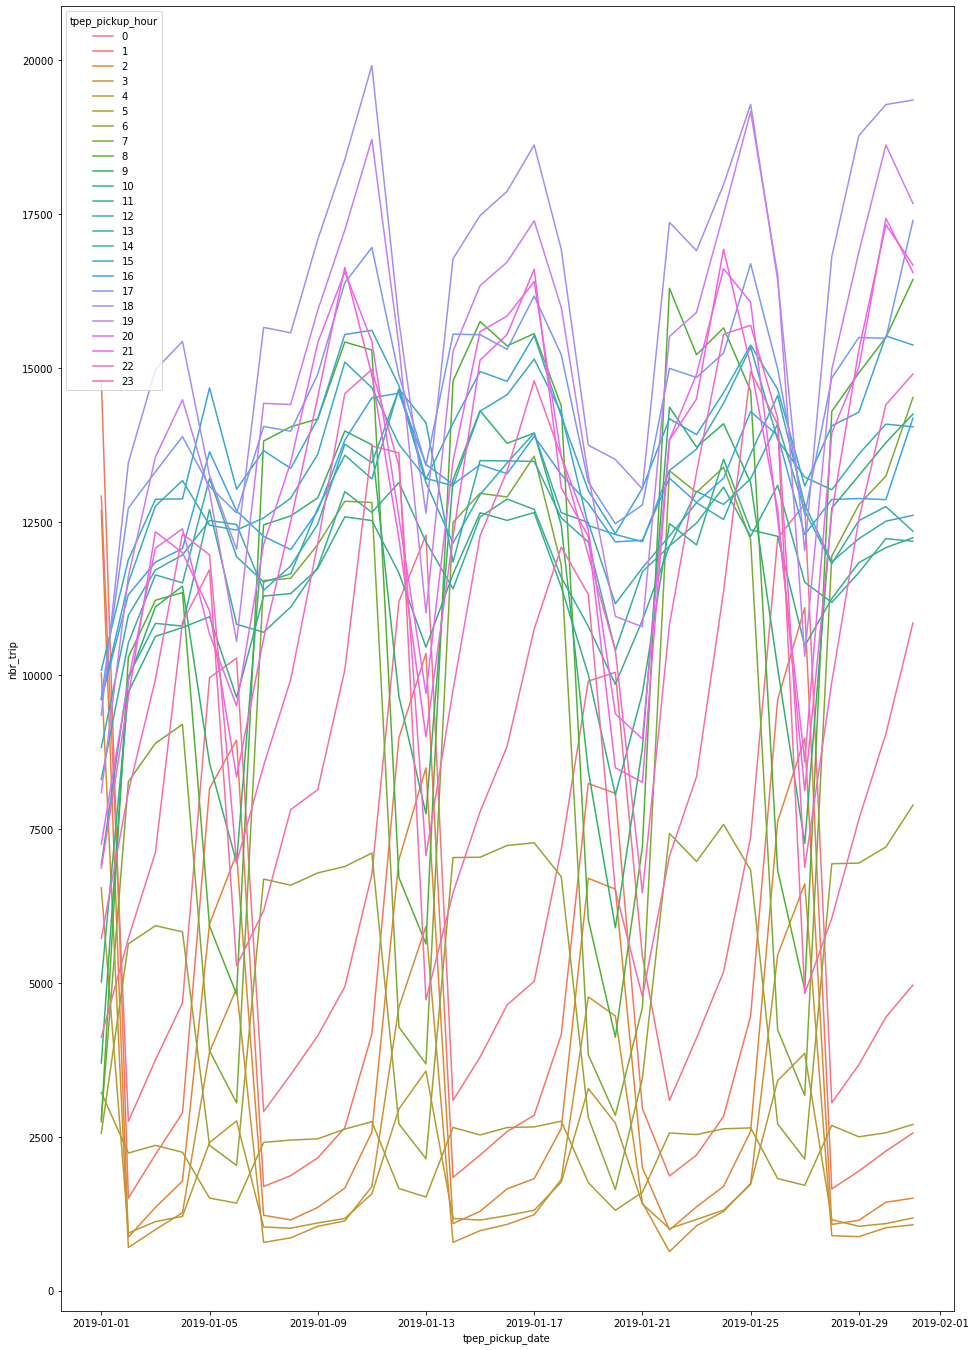

In [24]:
plt.figure(figsize=(16, 24))
sns.lineplot(x="tpep_pickup_date", y="nbr_trip",
             hue="tpep_pickup_hour",
             data=TimeSeries)

The figure above shows us that there is a weekly seasonal pattern, and we can see the number of trips alternate between day trips and a late night trip. We need to go more in depth by plotting in different figures the day activity and night activity.

In [32]:
TimeSeries_day = TimeSeries.loc[TimeSeries.tpep_pickup_hour.map(lambda x: int(x) >= 8 and int(x) <= 18)]

In [34]:
TimeSeries_day.head()

,tpep_pickup_date,tpep_pickup_hour,nbr_trip
29,2019-01-01,8,2744
30,2019-01-01,9,3699
31,2019-01-01,10,5016
32,2019-01-01,11,6923
33,2019-01-01,12,8307


In [36]:
TimeSeries_night = TimeSeries.loc[TimeSeries.tpep_pickup_hour.map(lambda x: int(x) < 8 or int(x) >= 19)]

In [37]:
TimeSeries_night.head()

,tpep_pickup_date,tpep_pickup_hour,nbr_trip
21,2019-01-01,0,12914
22,2019-01-01,1,14816
23,2019-01-01,2,12674
24,2019-01-01,3,10037
25,2019-01-01,4,6548


<AxesSubplot:xlabel='tpep_pickup_date', ylabel='nbr_trip'>

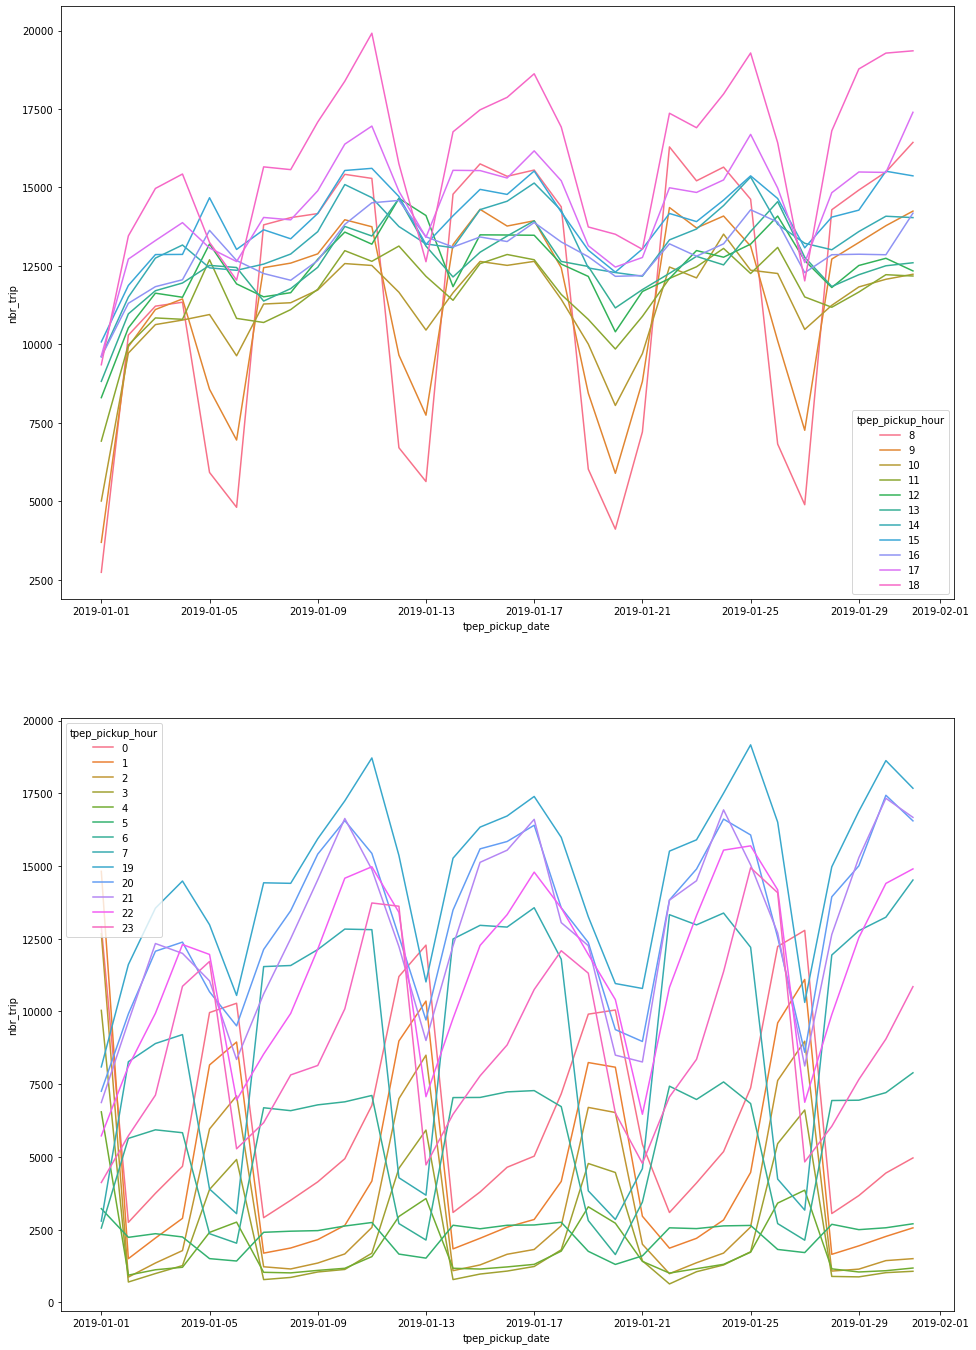

In [44]:
plt.figure(figsize=(16, 24))
plt.subplot(211)
sns.lineplot(x="tpep_pickup_date", y="nbr_trip",
             hue="tpep_pickup_hour",
             data=TimeSeries_day)
plt.subplot(212)
sns.lineplot(x="tpep_pickup_date", y="nbr_trip",
             hue="tpep_pickup_hour",
             data=TimeSeries_night)

The first plot shows the activity during the day from 8:00 am to 6:59 pm it shows that the activity is seasonal. The second plot is also seasonal, we can see that the number of trips is minimal between 2:00am and 5:59am and the and the maximum activity occurs between 7:00pm and 1:59am. the pick of activity doesn't happen the same day between two figures it may be probably due to weekend for the second plot.